Exercício inicial apresentado no primeiro período na matéria do Gustavo:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
base     = pd.read_csv('heart.csv')
entradas = base.iloc[:, 0:13].values
saidas   = base.iloc[:, 13].values

In [3]:
labelencoder = LabelEncoder()
saidas       = labelencoder.fit_transform(saidas)
saidas       = np_utils.to_categorical(saidas)

In [4]:
etreino, eteste, streino, steste = train_test_split(entradas, saidas, test_size = 0.25)

In [5]:
classificador = Sequential()

classificador.add(Dense(50, activation = 'relu', 
                            input_dim  = 13))
classificador.add(Dense(50, activation = 'relu'))
classificador.add(Dense(50, activation = 'relu'))
classificador.add(Dense(2,  activation = 'softmax'))
classificador.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                700       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 5,902
Trainable params: 5,902
Non-trainable params: 0
_________________________________________________________________


In [6]:
classificador.compile(optimizer              = 'adam', 
                            loss             = 'categorical_crossentropy', 
                            metrics          = 'accuracy')
history = classificador.fit(etreino, 
                            streino, 
                            batch_size       = 10, 
                            epochs           = 100, 
                            validation_split = 0.1)

Epoch 1/100
21/21 [==============================] - 3s 46ms/step - loss: 7.8255 - accuracy: 0.5392 - val_loss: 1.6457 - val_accuracy: 0.6522
Epoch 2/100
21/21 [==============================] - 0s 10ms/step - loss: 1.2680 - accuracy: 0.6667 - val_loss: 1.1050 - val_accuracy: 0.5652
Epoch 3/100
21/21 [==============================] - 0s 10ms/step - loss: 0.8891 - accuracy: 0.6618 - val_loss: 0.6684 - val_accuracy: 0.5652
Epoch 4/100
21/21 [==============================] - 0s 8ms/step - loss: 1.2382 - accuracy: 0.6275 - val_loss: 1.4397 - val_accuracy: 0.6522
Epoch 5/100
21/21 [==============================] - 0s 10ms/step - loss: 0.8808 - accuracy: 0.6471 - val_loss: 0.7260 - val_accuracy: 0.6522
Epoch 6/100
21/21 [==============================] - 0s 10ms/step - loss: 1.1055 - accuracy: 0.6373 - val_loss: 1.1133 - val_accuracy: 0.6087
Epoch 7/100
21/21 [==============================] - 0s 11ms/step - loss: 0.8090 - accuracy: 0.6814 - val_loss: 0.6998 - val_accuracy: 0.6087
Epoch 8

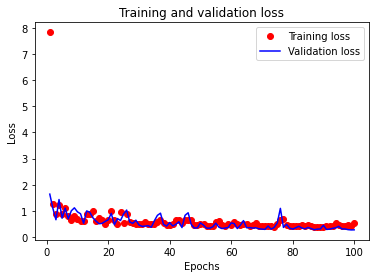

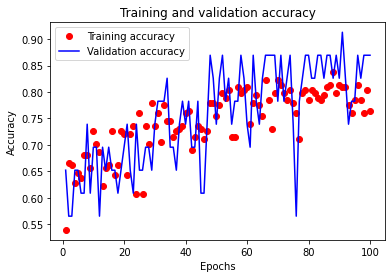

3/3 [==============================] - 0s 3ms/step


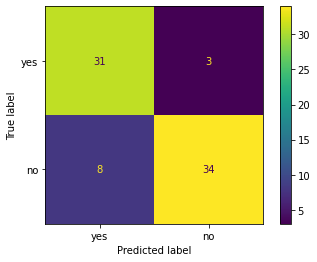

In [7]:
#Plot Training and validation loss
history_dict    = history.history
loss_values     = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values      = history_dict['accuracy']
val_acc_values  = history_dict['val_accuracy']
epochs          = np.arange(1,100 + 1)

#Plot Training and validation accuracy
plt.plot(epochs, loss_values, 'ro'   , label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

plt.plot(epochs, acc_values, 'ro'   , label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Plot Confusion Matrix
previsoes = classificador.predict(eteste)

steste2        = [np.argmax(t) for t in steste]
previsoes2     = [np.argmax(t) for t in previsoes]
matrizconfusao = confusion_matrix(previsoes2, steste2,labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=matrizconfusao,display_labels=['yes','no'])
disp.plot()

In [8]:
previsoes = (previsoes > 0.5)
score = classificador.evaluate(eteste, steste, verbose=1)
print('Test score',    score[0])
print('Test accuracy', score[1])

3/3 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8553
Test score 0.3409169912338257
Test accuracy 0.8552631735801697


In [9]:
acuracia = accuracy_score(steste, previsoes)
precisao = precision_score(steste, previsoes,average='weighted')
recal    = recall_score(steste, previsoes,average='weighted')
f1       = f1_score(steste, previsoes,average='weighted')
nota     = (((acuracia + precisao + recal)/3) )

print ("A acurácia foi de {:.2f}%.".format(acuracia*100))
print ("A precisão foi de {:.2f}%.".format(precisao*100))
print ("O recall foi de {:.2f}%.".format(recal*100))
print ("O F1 Score foi de {:.2f}%.".format(f1*100))
print ("A média a ser considerada para a nota é {:.2f}%.".format(nota*100))
print ('Matriz de Confusao:')
print (matrizconfusao)

print(acuracia)
print(precisao)
print(recal)
print(f1)

A acurácia foi de 85.53%.
A precisão foi de 86.20%.
O recall foi de 85.53%.
O F1 Score foi de 85.49%.
A média a ser considerada para a nota é 85.75%.
Matriz de Confusao:
[[31  3]
 [ 8 34]]
0.8552631578947368
0.8619895326551673
0.8552631578947368
0.8548866965402061


Testes com o uso de técnicas de Active Learning

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mean

from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation


In [142]:
#def split(dataset, train_size, test_size):
#    entradas = base.iloc[:, 0:13].values
#    saidas   = base.iloc[:, 13].values

#    etreino, epool, streino, spool = train_test_split(entradas, saidas, train_size = train_size)
#    unlabel, eteste, label, steste = train_test_split(epool, spool, test_size = test_size)


 #   return etreino, streino, eteste, steste, unlabel, label

In [153]:
if __name__ == '__main__':
  
#    for i in range(100):
    for i in range(100):
        
        dataset = pd.read_csv("./heart.csv").values[:, ]
 
        #imputing missing data
        entradas = dataset[:, 0:13]
        saidas   = dataset[:, 13]

        #feature scaling
        labelencoder = LabelEncoder()
        saidas       = labelencoder.fit_transform(saidas)
        saidas       = np_utils.to_categorical(saidas)
  
        # split dataset into train(5 %), test(25 %), unlabel(70 %)
        # etreino, streino, eteste, steste, unlabel, label = split(dataset, 0.05, 0.25)
        etreino, epool, streino, spool = train_test_split(entradas, saidas, train_size = 0.05, test_size = 0.25)
        unlabel, eteste, label, steste = train_test_split(epool, spool, train_size = 0.05, test_size = 0.25)
 
        # train model by active learning
        for i in range(100):
            classificador1 = Sequential()
            classificador1.add(Dense(50, activation = 'relu', 
                                         input_dim  = 13))
            classificador1.add(Dense(50, activation = 'relu'))
            classificador1.add(Dense(50, activation = 'relu'))
            classificador1.add(Dense( 2, activation = 'softmax'))

            classificador1.compile(optimizer        = 'adam', 
                                   loss             = 'categorical_crossentropy', 
                                   metrics          = 'accuracy')

            history1 = classificador1.fit(etreino, 
                                          streino, 
                                          batch_size       = 10, 
                                          epochs           = 100, 
                                          validation_split = 0.1)

            y_probab = classificador1.predict(unlabel)[:, 0]
            classificador1.fit(etreino, streino)
            p = 0.47 # range of uncertanity 0.47 to 0.53
            uncrt_pt_ind = []
            for i in range(unlabel.shape[0]):
                if(y_probab[i] >= p and y_probab[i] <= 1-p):
                    uncrt_pt_ind.append(i)
            etreino_unlabel = np.append(unlabel[uncrt_pt_ind, :], etreino, axis = 0)
            streino_label   = np.append(label[uncrt_pt_ind], streino)
            unlabel         = np.delete(unlabel, uncrt_pt_ind, axis = 0)
            label           = np.delete(label, uncrt_pt_ind)

        classificador2 = Sequential()
        classificador2.add(Dense(50, activation = 'relu', 
                                     input_dim  =  13))
        classificador2.add(Dense(50, activation = 'relu'))
        classificador2.add(Dense(50, activation = 'relu'))
        classificador2.add(Dense( 2, activation = 'softmax'))

        classificador2.compile(optimizer        = 'adam', 
                               loss             = 'categorical_crossentropy', 
                               metrics          = 'accuracy')
        history2 = classificador2.fit(etreino, 
                                      streino, 
                                      batch_size       = 10, 
                                      epochs           = 100, 
                                      validation_split = 0.1)
    
        # train model without active learning
        classificador3 = Sequential()
        classificador3.add(Dense(50, activation = 'relu', 
                                     input_dim  =  13))
        classificador3.add(Dense(50, activation = 'relu'))
        classificador3.add(Dense(50, activation = 'relu'))
        classificador3.add(Dense(2,  activation = 'softmax'))

        classificador3.compile(optimizer        = 'adam', 
                               loss             = 'categorical_crossentropy', 
                               metrics          = 'accuracy')
        history3 = classificador3.fit(etreino, 
                                      streino, 
                                      batch_size       = 10, 
                                      epochs           = 100, 
                                      validation_split = 0.1)


Epoch 1/100
2/2 [==============================] - 1s 390ms/step - loss: 27.9866 - accuracy: 0.3846 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 81ms/step - loss: 17.2255 - accuracy: 0.3846 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 52ms/step - loss: 7.8438 - accuracy: 0.3846 - val_loss: 8.0582e-05 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 65ms/step - loss: 0.9813 - accuracy: 0.4615 - val_loss: 1.6787 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 50ms/step - loss: 3.8002 - accuracy: 0.6154 - val_loss: 6.7358 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 58ms/step - loss: 5.9641 - accuracy: 0.6154 - val_loss: 7.6754 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 63ms/step - loss: 6.2818 - accuracy: 0.6154 - val_loss: 5.9016 - val_accuracy: 

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

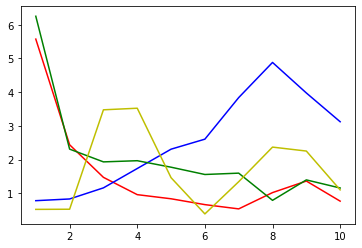

In [151]:
#Plot Training and validation loss
history_dict1     = history1.history
loss_values1      = history_dict1['loss']
val_loss_values1  = history_dict1['val_loss']
acc_values1       = history_dict1['accuracy']
val_acc_values1   = history_dict1['val_accuracy']

history_dict2     = history2.history
loss_values2      = history_dict2['loss']
val_loss_values2  = history_dict2['val_loss']
acc_values2       = history_dict2['accuracy']
val_acc_values2   = history_dict2['val_accuracy']

history_dict3     = history3.history
loss_values3      = history_dict3['loss']
val_loss_values3  = history_dict3['val_loss']
acc_values3       = history_dict3['accuracy']
val_acc_values3   = history_dict3['val_accuracy']

epochs            = np.arange(1,100 + 1)

#Plot Training and validation accuracy
plt.plot(epochs, loss_values1,     'r', label = 'Active Learning Training1 Loss')
plt.plot(epochs, val_loss_values1, 'b', label = 'Active Learning Validation1 Loss')
plt.plot(epochs, loss_values2,     'g', label = 'Active Learning Training2 Loss')
plt.plot(epochs, val_loss_values2, 'y', label = 'Active Learning Validation2 Loss')
plt.plot(epochs, loss_values3,     'p', label = 'Normal Training Loss')
plt.plot(epochs, val_loss_values3, 'c', label = 'Normal Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values1,     'r', label = 'Active Learning Training1 accuracy')
plt.plot(epochs, val_acc_values1, 'b', label = 'Active Learning Validation1 accuracy')
plt.plot(epochs, acc_values2,     'y', label = 'Active Learning Training2 accuracy')
plt.plot(epochs, val_acc_values2, 'g', label = 'Active Learning Validation2 accuracy')
plt.plot(epochs, acc_values3,     'p', label = 'Normal Training accuracy')
plt.plot(epochs, val_acc_values3, 'c', label = 'Normal Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

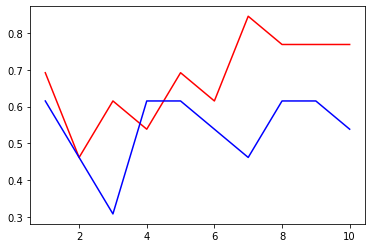

In [152]:
#Plot Training and validation loss
history_dict1     = history1.history
acc_values1       = history_dict1['accuracy']

history_dict2     = history2.history
acc_values2       = history_dict2['accuracy']

history_dict3     = history3.history
acc_values3       = history_dict3['accuracy']
epochs            = np.arange(1,100 + 1)

#Plot Training and validation accuracy
plt.plot(epochs, acc_values1,     'r', label = 'Active Learning Training 1 accuracy')
plt.plot(epochs, acc_values2,     'b', label = 'Active Learning Training 2 accuracy')
plt.plot(epochs, acc_values3,     'g', label = 'Normal Training accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#            classificador1.fit(x_train, y_train)
#            y_probab = classificador1.predict_proba(unlabel)[:, 0]
#            y_probab = classificador2.predict(x_test)


predictions2 = classificador2.predict(x_test)
cm2          = metrics.confusion_matrix(y_test, predictions2)
train_size   = x_train.shape[0]/dataset.shape[0]


predictions3 = classificador3.predict(x_test)
cm3 = metrics.confusion_matrix(y_test, predictions3)

In [28]:
previsoes = (previsoes > 0.5)
score     = classificador1.evaluate(eteste, steste, verbose=1)
print('Test score',    score[0])
print('Test accuracy', score[1])

TypeError: '>' not supported between instances of 'list' and 'float'

In [29]:
#Plot Confusion Matrix
previsoes      = classificador1.predict(x_test)
steste         = [np.argmax(t) for t in y_test]
previsoes      = [np.argmax(t) for t in previsoes]
matrizconfusao = confusion_matrix(previsoes, steste,labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=matrizconfusao,display_labels=['yes','no'])
disp.plot()

3/3 [==============================] - 0s 4ms/step


ValueError: Found input variables with inconsistent numbers of samples: [76, 72]